## Snippets from chapter 8

First code snippet

In [1]:
import pandas as pd

df = pd.read_csv('data/stock_prices.csv')
df.head()

,Date,Stock,Close
0,2011-05-25,DTE,51.12
1,2011-05-24,DTE,51.51
2,2011-05-23,DTE,51.47
3,2011-05-20,DTE,51.90
4,2011-05-19,DTE,51.91


Second code snippet

In [2]:
from dateutil.parser import parse
df['Date'] = df.apply(lambda row: parse(row['Date']), axis = 1) 

Third code snippet

In [3]:
df_matrix = df.pivot(index='Date', columns='Stock', values='Close')

Fourth code snippet

In [4]:
df = df[df['Date'] != parse('2002-02-01')]
df = df[df['Stock'] != 'DDR']

df_matrix = df.pivot(index='Date', columns='Stock', values='Close')

Fifth code snippet

C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4384: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4385: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


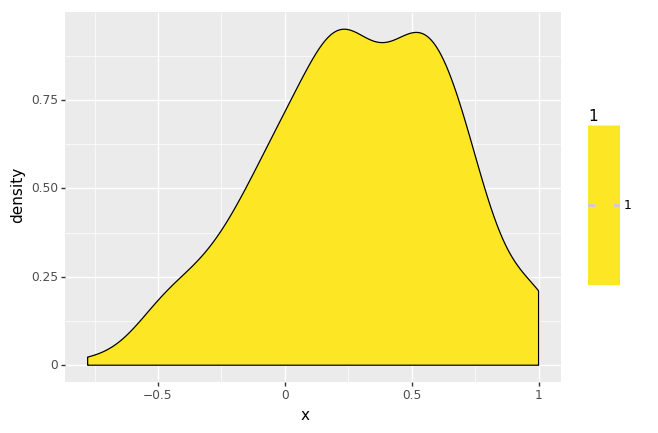

<ggplot: (-9223371944200368324)>

In [5]:
%matplotlib inline
from plotnine import *
import itertools

correlations = df_matrix.corr().values.tolist()
correlations = list(itertools.chain(*correlations))

fig = (
    ggplot(data = pd.DataFrame({'x': correlations}), mapping=aes(x = 'x',  fill = '1')) +
    geom_density()
)

fig

Sixth code snippet

In [6]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(df_matrix).astype('float32')

pca = PCA()
principalComponents = pca.fit_transform(df_pca)

Seventh code snippet

In [7]:
pca.explained_variance_ratio_

array([4.60008288e-01, 2.26961503e-01, 8.72396146e-02, 7.13873740e-02,
       3.92142584e-02, 3.64988242e-02, 1.66953635e-02, 1.42963918e-02,
       1.24048346e-02, 9.84662256e-03, 5.93394269e-03, 3.72823060e-03,
       3.39137416e-03, 2.56885582e-03, 2.05913312e-03, 1.90085484e-03,
       1.56696068e-03, 1.45110493e-03, 8.25512965e-04, 6.91296688e-04,
       5.30007251e-04, 4.00242418e-04, 2.96714205e-04, 1.02695534e-04])

Eighth code snippet

In [8]:
market_index = pca.transform(df_pca).shape[:1]

Ninth code snippet

In [9]:
dji_prices = pd.read_csv('data/DJI.csv')
dji_prices['Date'] = dji_prices.apply(lambda row: parse(row['Date']), axis = 1) 

Tenth code snippet

In [10]:
dji_prices = dji_prices[df['Date'] > parse('2001-12-31')]
dji_prices = dji_prices[df['Date'] != parse('2002-02-01')]

C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\dazb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


## To be continue